<style>
    
    h1 {
      display: block;
      max-width: 100%;
      margin-left: auto;
      margin-right: auto;
      text-align: center;
      font-family: "Arial";
      font-size: 32px;
      line-height: 60px;
      font-style: normal;
    }
    
    h2 {
      font-family: "Arial", serif;
      font-size: 24px;
    }

    h3 {
      font-family: "Arial", serif;
      font-size: 20px;
    }

    h4 {
      text-align: center;
      font-size: 20px;
    }

    h5 {
      font-family: "Arial", serif;
      font-size: 16px;
      font-style: oblique;
    }

    div.text_cell_render {
      padding-left: 5%;
      padding-right: 5%;
      width: 90%;
      font-family: "Tahoma", serif;
      font-size: 14px;
    }
    
</style>


<br>
<div align="center"><h1>Pyeongchang Olympic medal ranker<br>web scraper</h1></div>

<br><br>
<h5>Faraz Babaei, 2018-2-16 ~ 17</h5>
<br>

<h2>Intro</h2>

<br>

<h2>Method</h2>

<p>Data is collected from 2 websites, read, reformatted, and plotted.</p>
<p>- MatplotlibDeprecationWarning is suppressed in Choropleth execution cell</p>
<p>- OAR is patched as Russia (RUS) on the choropleth</p>

<br>

<h2><b>Results</b></h2>

<p>Nations rank well.</p>

<br>


In [1]:
""" Hide code segments from nbviewer output """
""" From http://protips.maxmasnick.com/hide-code-when-sharing-ipython-notebooks """
import IPython.core.display as di
# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)
# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
""" Conversion rate   Faraz Babaei   2018-2-16 ~ 2018-2-17 """
""" Imports and data reading """

import requests
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rcParams
# from matplotlib.gridspec import GridSpec
from IPython.core.display import display
from mpl_toolkits.basemap import Basemap, Polygon

# import re
from time import time, sleep
from random import randint
import warnings

np.random.seed (18216)
%matplotlib inline
plt.style.use('ggplot')   # style for plots
# formats floats to show up with 4 dec. digits when display() used
# pd.set_option('display.float_format', lambda x: '%.3f' % x)

""" Constants """
SCR_MOD = {"G":4, "S":2, "B":1}   # Scoring model designating points to gold, silver, and bronze medals


In [3]:
""" Scraping data off web """

CTRS_URL = "https://www.olympic.org/pyeongchang-2018/results/en/general/nocs-list.htm"
MDLS_URL_1 = "https://www.pyeongchang2018.com/en/game-time/results/OWG2018/en/general/medal-standings.htm"
MDLS_URL_2 = "https://www.cnn.com/2018/02/08/sport/winter-olympics-" + \
                "2018-pyeongchang-medal-table/index.html"
MDLS_URL_3 = "http://time.com/5163230/2018-winter-olympic-medal-tracker/"

params_0, params_1 = None, None#{"lat": 37.78, "lon": -122.41}
ctrs_rsp = requests.get (CTRS_URL, params=params_0)
#sleep( randint(1,3) )   # wait 1-3 s btw requests from domain. Nvm; sites are different
mdls_rsp_1 = requests.get (MDLS_URL_1, params=params_1)

print (ctrs_rsp)#.status_code)
print (mdls_rsp_1)#.status_code)
# I split the cell not to keep GETting from the site, which might get angry, which is unlikely anyway.


<Response [200]>
<Response [200]>


In [4]:
""" Countries: Collecting them """

bsp_ctrs = BeautifulSoup ( ctrs_rsp.content, 'html.parser' )
# print (bsp.prettify())

cls_ctrs = bsp_ctrs.find_all ( class_="CountriesList" )
inf_ctrs = cls_ctrs[0].find_all( "div" )

print ( type(inf_ctrs), len(inf_ctrs) )

ctr_names = []
ctr_codes = []

for ctr_inf in inf_ctrs:
    if len (ctr_inf.get_text().strip()) > 0:   # To exclude the div after UZB wo/ any ctr info
        
        imgs_inf = ctr_inf.find_all("img")
        ctr_flag_img_fl = imgs_inf[0]["src"].rsplit("/")[-1]
        ctr_code = ctr_flag_img_fl.split(".")[0]
        
        ctr_names.append ( ctr_inf.get_text().strip() )
        ctr_codes. append (ctr_code)


ctr_cods_nms = list(zip(ctr_codes, ctr_names))
print ( "num countries: {}\n".format(len(ctr_cods_nms)) )
print_list = ["{}: {} {}".format(i,ccn[0],ccn[1]) for i,ccn in enumerate(ctr_cods_nms)]
print ( "{}\n...\n{}".format( "\n".join(print_list[:5]), "\n".join(print_list[-5:]) ) )

ctrs_dct = {noc:nm for noc,nm in zip(ctr_codes,ctr_names)}
print (ctrs_dct)


<class 'bs4.element.ResultSet'> 94
num countries: 93

0: ALB Albania
1: AND Andorra
2: ARG Argentina
3: ARM Armenia
4: AUS Australia
...
88: TPE Chinese Taipei
89: TUR Turkey
90: UKR Ukraine
91: USA United States of America
92: UZB Uzbekistan
{'ALB': 'Albania', 'AND': 'Andorra', 'ARG': 'Argentina', 'ARM': 'Armenia', 'AUS': 'Australia', 'AUT': 'Austria', 'AZE': 'Azerbaijan', 'BEL': 'Belgium', 'BER': 'Bermuda', 'BIH': 'Bosnia and Herzegovina', 'BLR': 'Belarus', 'BOL': 'Bolivia', 'BRA': 'Brazil', 'BUL': 'Bulgaria', 'CAN': 'Canada', 'CHI': 'Chile', 'CHN': "People's Republic of China", 'COL': 'Colombia', 'COR': 'Korea', 'CRO': 'Croatia', 'CYP': 'Cyprus', 'CZE': 'Czech Republic', 'DEN': 'Denmark', 'ECU': 'Ecuador', 'ERI': 'Eritrea', 'ESP': 'Spain', 'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France', 'GBR': 'Great Britain', 'GEO': 'Georgia', 'GER': 'Germany', 'GHA': 'Ghana', 'GRE': 'Greece', 'HKG': 'Hong Kong, China', 'HUN': 'Hungary', 'IND': 'India', 'IRI': 'Islamic Republic of Iran', 'IRL'

In [5]:
""" Medals list 1 """

# TODO: Medal counts. Try collecting them from 2 sources and comparing or one for backup!
bsp_mdls_1 = BeautifulSoup ( mdls_rsp_1.content, 'html.parser' )
# print (bsp.prettify())

cls_mdls = bsp_mdls_1.find_all ( class_="ResTableFull" )
#print (cls_mdls)
mdl_trs = cls_mdls[0].find_all( "tr" )
# print ( type(mdl_trs), len(mdl_trs) )

INI_MDLS_DCT = {"G":0, "S":0, "B":0}
mdls_dict = {k:INI_MDLS_DCT.copy() for k in ctr_codes}

# Note: If the website format changes in any form, the following will most probably not work!
    # Not working is preferred to producing the wrong info, we've made sure it does disbehave rather than misbehave
# TODO: Change Note above
# TODO: Implement call-catch exceptions?

for td_coll in mdl_trs[1:]:   # index 0 contains table heading actually
    for td in td_coll.find_all( "td" )[2:-1]:
        for link_inf in td.find_all("a"):
            # TODO: We're ignoring some redundant structure of the html page here, the table rows.
            tbl_cell_ttl = link_inf["title"].split()[0]
            noc_code = tbl_cell_ttl[:3]
            mdl_type = tbl_cell_ttl[3]
#             print (noc_code, mdl_type, int(link_inf.get_text()))

            if noc_code not in mdls_dict:
                print ("Problem: NOC not in participants list!")
            mdls_dict[noc_code][mdl_type] = int(link_inf.get_text())

# print (mdls_dict)
# for etr in mdls_dict.keys():
#     print (etr, mdls_dict[etr])


In [6]:
""" Score allocation """

# A long recursive (?) dictionry comprehension
score_by_mdl_dct = { k1:{k2:v2*SCR_MOD[k2] for k2,v2 in v1.items()} \
                    for k1,v1 in mdls_dict.items() }
scores_dct = { k1:sum([v2 for v2 in v1.values()]) \
              for k1,v1 in score_by_mdl_dct.items() }
# print (scores_dct)
scores_tpls = sorted ( scores_dct.items(), key=lambda x: (x[0]) )   # It was already sorted!
scores_tpls = sorted ( scores_dct.items(), key=lambda x: (x[1]), reverse=True )
ct_sc_sub = [ (a,ctrs_dct[a],b) for a,b in scores_tpls if b != 0 ]
# print (ct_sc_sub)

ct_scs = list( zip(*scores_tpls) )
ct_scs_sub = list( zip(*ct_sc_sub) )

scr_df = pd.DataFrame ({"Score":ct_scs_sub[2]}, index=ct_scs_sub[0])
display (scr_df.T)


,NOR,GER,CAN,NED,USA,AUT,FRA,SWE,JPN,SUI,...,GBR,BLR,AUS,POL,UKR,FIN,ESP,SLO,KAZ,LIE
Score,62,50,36,36,28,24,24,22,21,17,...,7,6,5,4,4,3,2,2,1,1


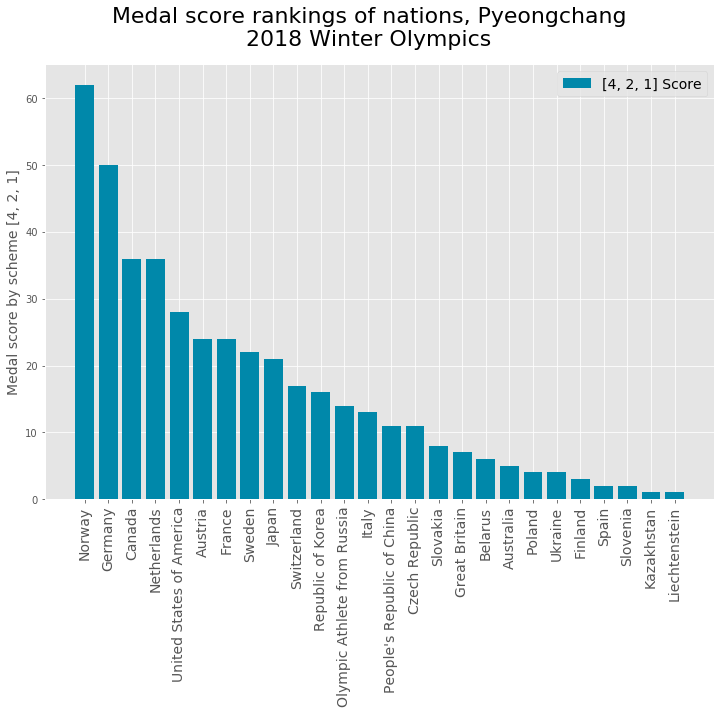

Figure N: Medal score rankings of nations, Pyeongchang 2018 Winter Olympics.


In [7]:
""" Visualization """

fig = plt.figure(figsize=(12,8), facecolor="#ffffff")
plt.bar ( range(len(ct_scs_sub[1])), ct_scs_sub[2], align='center', \
         color='#0088aa', log=False, label="{} Score".format( list(SCR_MOD.values()) ) )
# plt.bar ( range(len(ct_scs_sub[1])), ct_scs_sub[2], align='center', log=False, label="{4,2,1} Score" )
plt.suptitle ( "Medal score rankings of nations, Pyeongchang\n2018 Winter Olympics", fontsize=22 )
plt.xticks ( range(len(ct_scs_sub[1])), ct_scs_sub[1], fontsize=14, rotation=90 )
plt.ylabel ( "Medal score by scheme {}".format( list(SCR_MOD.values()) ), fontsize=14 )
plt.legend ( loc='upper right', fontsize=14 )
plt.show()
print ("Figure N: Medal score rankings of nations, Pyeongchang 2018 Winter Olympics.")


In [8]:
""" Choropleth functions and initiation """

def draw_map (ser, clr_inf):
    """ Function to draw choropleth based on input pandas Series and color map in "robin" world map projection """
    lMax = ser.max()    # lMin would be zero
    clr_vals = {}
    
    for ctr in ser.index:
        score = ser.loc[ctr]
        try:
            # C[C["IOCode"]==ctr]["ISO_3"]  finds ISO_3 col of row where this row's IOCode col has ctr.
            # Segment above returns a Series. So I had to to .tolist()[0] to retrieve its only elem
            key = ctr_nm_map[ctr_nm_map["IOCode"]==ctr]["ISO_3"].tolist()[0]
            clr_vals[key] = 1.0 * score / lMax   # The 1.0 used to be 0.8, but that made the color bar legend quite wrong
        except ( KeyError, IndexError ) as e:
            print ( "Hello {}".format(ctr) )
            continue   #print (e) or just ignore
    
    ini_lon = 0. #10. preferred but horizontal streaks appear from polygons of Bering islands cut off by the 10 degree boundary
    m = Basemap ( projection='robin', lon_0=ini_lon, resolution='c' )
    m.readshapefile ( 'res/ne_10m_ctr_shape/ne_10m_admin_0_countries', 'NE_10m_Countries' )
    
    m.drawmapboundary ( color='black', fill_color='#005566' )   # draw white map background and remove boundary line
    #m.drawcoastlines(color='grey')            # not exactly needed but adds definition, e.g. to Amazon river
    m.fillcontinents ( color='#222222', lake_color='#005566' )
    m.drawcountries(linewidth=1, color='grey')
    graticule_width = 30                       # spacing (in deg?) btw lon- or lat-lines on map
    graticule_color = '#333333'
    parallels = np.arange ( -90, 91, graticule_width )
    meridians = np.arange ( -180., 181., graticule_width )
    dashes = [3,5]                             # We wish to change the dashline style to 3-on, 5-off in pixels
    m.drawparallels ( parallels, dashes=dashes, color=graticule_color, linewidth=0.4 )
    m.drawmeridians ( meridians, dashes=dashes, color=graticule_color, linewidth=0.4 )
    
    ax = plt.gca()
    for info, shape in zip( m.NE_10m_Countries_info, m.NE_10m_Countries ):
        try:
            curVal = clr_vals [ info['ADM0_A3'] ]
            if np.isnan(curVal):
                color = '#222222'
            else:
                color = clr_inf[0] ( curVal**clr_inf[1] )
        except ( KeyError, IndexError ): continue
        ax.add_patch( Polygon( np.array(shape), facecolor=color, \
                              edgecolor='black', linewidth=0.4, zorder=2 ) )
    
    return


def draw_legend (clr_inf):
    """ Draw color bar legend with a cubic root color map;
    (help: http://ramiro.org/notebook/basemap-choropleth/) """
    ax_legend = fig.add_axes ( [0.26, -0.02, 0.48, 0.016], zorder=3 )
    grads = np.linspace (0.,1.,400)
    bins = np.linspace (0.,1.,11)
    scheme = [ clr_inf[0]((i/400.)**(clr_inf[1])) for i in range(400) ]
    cmap = matplotlib.colors.ListedColormap(scheme)
    cb = matplotlib.colorbar.ColorbarBase(ax_legend, cmap=cmap, \
                                          ticks=bins, orientation='horizontal')  # had: boundaries=grads**CLR_PWR,
    #cb.set_xticklabels ( [str(round(i, 1)) for i in bins] )
    #cb.set_xticklabels ( color='#ddbb00', fontsize=10 )
    #cb.draw_all()
    return

# def PolyArea(x,y):
#     """ Calculates area of a 2D polygon with given corespective x,y vertex lists inspired by
#     http://stackoverflow.com/questions/24467972/calculate-area-of-polygon-given-x-y-coordinates """
#     return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))

""" This portion belongs to next cell but here to suppress its output, otherwise I think impossible to suppress """
ini_lon = 0. #10. preferred but horizontal streaks appear from polygons of Bering islands cut off by the 10 degree boundary
m = Basemap ( projection='robin', lon_0=ini_lon, resolution='c' )


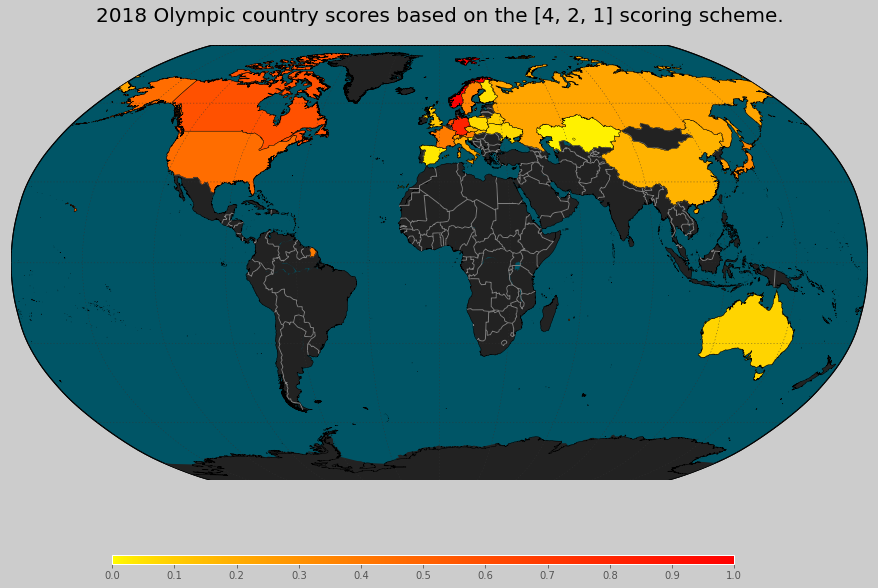

Figure N: World choropleth with contrast based on 2018 Olympic scores in the [4, 2, 1] scoring scheme.


In [9]:
""" Choropleth """

CLR_INF = (plt.cm.autumn_r, 0.7)   # (plt.cm.autumn_r, 0.7), (rainbow, 0.25), (Wistia, 0.50), (plasma, 0.33)

ctr_nm_map = pd.read_csv ("res/country names map.tsv", sep='\t')   # country codes-name map table
scr_ser = scr_df["Score"].copy()
# OAR -> RUS for choropleth: ISO-3 code for this year's Russia Olympic exception:
scr_ser.rename ( index={'OAR': "RUS"}, inplace=True )


warnings.filterwarnings("ignore", category=UserWarning)

fig = plt.figure ( figsize=(18,8) )
fig.patch.set_facecolor ( '#cccccc' )  # map background
plt.title ( "2018 Olympic country scores based on the {} scoring scheme.".\
           format( list(SCR_MOD.values()) ), fontsize=20, y=1.04 )
draw_map ( scr_ser, CLR_INF )
draw_legend ( CLR_INF )
#fig.tight_layout ()
plt.show()
print ( "Figure N: World choropleth with contrast based on 2018 Olympic scores in the"+\
       " {} scoring scheme.".format( list(SCR_MOD.values()) ) )

warnings.filterwarnings("default", category=UserWarning)
